# Part I - Analysis for San Francisco Bay Ford GoBike Service 2019
## by Olawoye Taofeek Opeyemi

## Introduction

The data consists of information regarding over 183,000 rides made in a bike-sharing system covering the greater San Francisco Bay area. The data features include duration (secs) and others such as DateTime, customer type, gender, and some additional variables.
Out of 16 specifications 9 are numerical, 2 are datetime, 4 are object type and 1 is boolean type.

 
## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import os
os.listdir()

['201902-fordgobike-tripdata.csv',
 'README.md',
 'Part_I_exploration_template.ipynb',
 'Part_II_slide_deck_template.ipynb',
 '.ipynb_checkpoints',
 'Part_I_exploration_template.html',
 'Part_II_slide_deck_template.slides.html']

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


The Data contains the following features:

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

##  Loading the dataset and taking closer look to see if any wrangling and cleaning is needed

In [3]:
#Loading the Dataset in dataframe using pd.read_csv
bike_rides = pd.read_csv('201902-fordgobike-tripdata.csv')

#### high-level overview of data shape and composition

In [4]:
# Loading to see the first five rows of the dataset
bike_rides.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
# Loading to see the last five rows of the dataset
bike_rides.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [6]:
# Getting the info of the dataset to see if any feature need dtype change.
bike_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [7]:
# Get the shape of the Dataset
bike_rides.shape

(183412, 16)

In [8]:
# Checking for Null Values
bike_rides.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [9]:
# Getting the summary statistics of the Dataset
bike_rides.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


## Data Wrangling

### Here is a summary of my data cleaning process

- Removed entries with missing values
- Converted the time column to DateTime and extracted the hour, day, month 
- Converted each feature to the appropriate data type

In [10]:
# making a copy of the actual dataset 
df = bike_rides.copy()

In [11]:
# Dropping null values as part of cleaning process
df.dropna(inplace=True)

In [12]:
df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


In [13]:
# Assert the number of rows as reduced after dropping the null values
df.shape

(174952, 16)

In [14]:
# maximum duration seconds
df['duration_sec'].max()

84548

In [15]:
# Locating the row with the max duration seconds
df.loc[df['duration_sec'] == 84548]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
85465,84548,2019-02-16 15:48:25.0290,2019-02-17 15:17:33.0800,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,-122.419622,6301,Subscriber,1981.0,Male,No


In [16]:
# minimum duration seconds
df['duration_sec'].min()

61

In [17]:
# Locating the row with the min duration seconds
df.loc[df['duration_sec'] == 61]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
18578,61,2019-02-26 18:23:44.2830,2019-02-26 18:24:45.5230,368.0,Myrtle St at Polk St,37.785434,-122.419622,368.0,Myrtle St at Polk St,37.785434,-122.419622,5333,Subscriber,1989.0,Female,No
19581,61,2019-02-26 16:40:53.1210,2019-02-26 16:41:54.4510,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5306,Subscriber,1987.0,Female,No
27017,61,2019-02-25 10:31:18.4150,2019-02-25 10:32:19.7480,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,5921,Subscriber,1972.0,Male,Yes
44301,61,2019-02-22 15:09:57.0480,2019-02-22 15:10:58.7420,310.0,San Fernando St at 4th St,37.335885,-121.885660,280.0,San Fernando St at 7th St,37.337122,-121.883215,6347,Subscriber,1989.0,Male,Yes
44787,61,2019-02-22 13:56:21.9760,2019-02-22 13:57:23.4650,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,81.0,Berry St at 4th St,37.775880,-122.393170,6150,Subscriber,1931.0,Male,No
51120,61,2019-02-21 18:27:34.9930,2019-02-21 18:28:36.6300,113.0,Franklin Square,37.764555,-122.410345,100.0,Bryant St at 15th St,37.767100,-122.410662,6515,Subscriber,1984.0,Male,No
58992,61,2019-02-20 21:44:00.1540,2019-02-20 21:45:01.2350,85.0,Church St at Duboce Ave,37.770083,-122.429156,85.0,Church St at Duboce Ave,37.770083,-122.429156,4351,Subscriber,1994.0,Male,No
64088,61,2019-02-20 13:08:18.2850,2019-02-20 13:09:19.4330,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,80.0,Townsend St at 5th St,37.775235,-122.397437,2090,Subscriber,1931.0,Male,No
80047,61,2019-02-18 16:31:12.8960,2019-02-18 16:32:14.5880,89.0,Division St at Potrero Ave,37.769218,-122.407646,101.0,15th St at Potrero Ave,37.767079,-122.407359,6195,Subscriber,1931.0,Male,No
82564,61,2019-02-18 09:53:31.3990,2019-02-18 09:54:33.1620,249.0,Russell St at College Ave,37.858473,-122.253253,249.0,Russell St at College Ave,37.858473,-122.253253,3054,Subscriber,1990.0,Male,No


### Converted the time column to DateTime and extracted the hour, day, month and year columns

In [18]:
# Using For loop to convert the date related columns from object into datetime 

dates = ['start_time', 'end_time']
for date in dates:
    df[date] = pd.to_datetime(df[date])
    
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory us

In [19]:
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No


### Extracting the hours, week day name and month, for both start_time and end_time to help answer the most important questions of our analysis.

In [20]:
df['start_day'] = df['start_time'].dt.day_name()
df['start_month'] = df['start_time'].dt.month_name()
df['start_hour'] = df['start_time'].dt.hour

df['end_day'] = df['end_time'].dt.day_name()
df['end_month'] = df['end_time'].dt.month_name()
df['end_hour'] = df['end_time'].dt.hour

In [21]:
# Check for day name obtain using .unique()
df['start_day'].unique()

array(['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday',
       'Friday'], dtype=object)

In [22]:
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Use pandas.astype() to convert the "start_day" column from a plain object type into an ordered categorical type 
StartdayClasses = pd.api.types.CategoricalDtype(ordered=True, categories=days)
df['start_day'] = df['start_day'].astype(StartdayClasses);

df['start_day'].value_counts()

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: start_day, dtype: int64

In [23]:
# Assert the ordering as worked
df['start_day'].unique()

[Thursday, Wednesday, Tuesday, Monday, Sunday, Saturday, Friday]
Categories (7, object): [Monday < Tuesday < Wednesday < Thursday < Friday < Saturday < Sunday]

In [24]:
df['end_day'].unique()

array(['Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday',
       'Saturday'], dtype=object)

In [25]:
# Use pandas.astype() to convert the "end_day" column from a plain object type into an ordered categorical type
df['end_day'] = df['end_day'].astype(StartdayClasses);

In [26]:
# Assert the ordering as worked
df['end_day'].unique()

[Friday, Thursday, Wednesday, Tuesday, Monday, Sunday, Saturday]
Categories (7, object): [Monday < Tuesday < Wednesday < Thursday < Friday < Saturday < Sunday]

In [27]:
# Check the element of both start_month and end_month using .unique()
print(df['start_month'].unique())
print(df['end_month'].unique())

['February']
['March' 'February']


In [28]:
# Creating a column for  actual Age naming it 'Age': which is gotten by subtracting the years from 2019.
df['Age'] = 2019 - df['member_birth_year']

In [29]:
# assert the 'Age' is formed
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,start_hour,end_day,end_month,end_hour,Age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,Thursday,February,17,Friday,March,8,35.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972.0,Male,No,Thursday,February,12,Friday,March,5,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989.0,Other,No,Thursday,February,17,Friday,March,4,30.0


In [30]:
# Converting the age column into int dtype

df['Age'] = df['Age'].astype(int)

In [31]:
# Since the 'start_month' and  'end_month' is the same all through their column I will be dropping them 

df.drop(columns=['end_month', 'start_month'], inplace=True)

In [32]:
# assert the columns listed above was dropped
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_hour,end_day,end_hour,Age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,Thursday,17,Friday,8,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,Thursday,12,Friday,5,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,Thursday,17,Friday,4,30


### What is the structure of your dataset?

> The data consists of information regarding over 183,000 rides made in a bike-sharing system covering the greater San Francisco Bay area. The data features include duration (secs) and others such as DateTime, customer type, gender, and some additional variables.
Out of 16 specifications 9 are numerical, 2 are datetime, 4 are object type and 1 is boolean type.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out how trip duration is dependent on other specifications from the dataset.

> In this investigation, I looked at how the duration of trips changes with respect to DateTime and customer type. The main focus was on hours of the day, days of the week and customer type.
>- When are most trips taken in terms of time of day, day of the week?
>- How long does the average trip take?
>- Does the above depend on if a user is a subscriber or customer?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that trip duration is highly dependent on how far the start stations and end stations are, more crowded places should receive more rides so some stations should be getting more duration sec. I also think user_type and gender and year of birth should also effect trip duration.

# Univariate Exploration

I'm starting by investigating the features of interest individually.

### User type analysis: Checking the Count of Subscribers and Customer and then converting it into a plot.

## Question: Which user type occurs the most

In [33]:
# Making a count on the user_type using .value_counts()
df['user_type'].value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

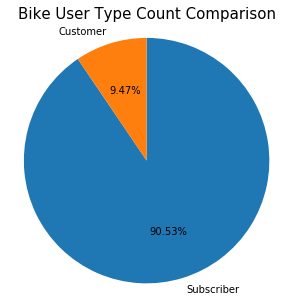

In [34]:
# Show user_type by it's percentage
plt.figure(figsize=(8,5))
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('Bike User Type Count Comparison', fontsize=15);

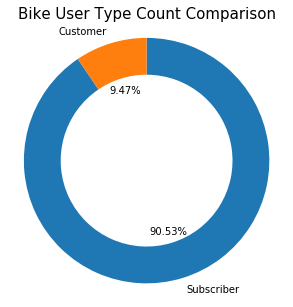

In [35]:
# Show user_type by it's percentage
plt.figure(figsize=(8,5))
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%', wedgeprops={'width':0.3});
plt.axis('square')
plt.title('Bike User Type Count Comparison', fontsize=15);

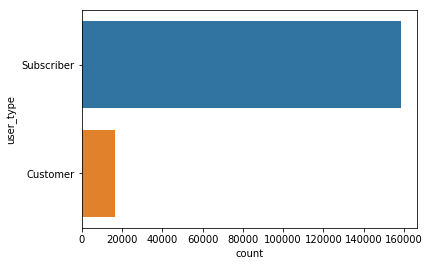

In [36]:
# Making a bar chart using sns.countplot() to see the most common user_type
sns.countplot(data=df, y='user_type', order=sorted_counts.index);

In [37]:
# Checking the shape once again
df.shape

(174952, 21)

### Bike User Observation
>From the total entry of 174952 row in 2019 data after dropping Null value, Subscriber is more than 9 times the Customer user type.
> - Subscriber    :158386
> - Customer       :16566

## Question: When are most trips taken in terms of time of day, day of the week?

- Ride Frequency by days

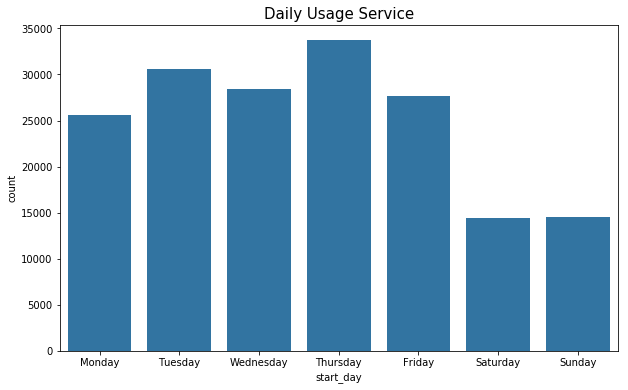

In [75]:
# Since start_day is a categorical feature, a bar chart representation depicting day with the highest amount of ride is the best option
base_color = sns.color_palette()[0]

plt.figure(figsize=(10,6))
plt.title('Daily Usage Service', fontsize=15)
sns.countplot(data=df, x='start_day', color=base_color);

### Question: Which of the days of the week has the highest Duration seconds on average.

In [39]:
# Grouping by 'start_day' to find the days with the highest duration seconds on average.
df.groupby('start_day')['duration_sec'].mean()

start_day
Monday       696.970906
Tuesday      652.839459
Wednesday    665.127946
Thursday     678.289748
Friday       681.274699
Saturday     849.771750
Sunday       858.673649
Name: duration_sec, dtype: float64

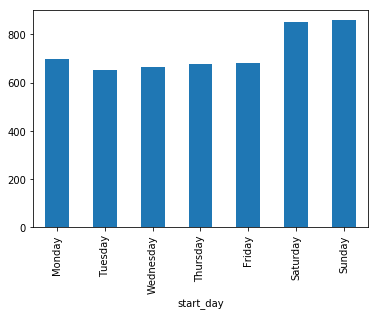

In [40]:
# Create a bar chart to see which of the weekdays recorded the highest duration seconds on average.
df.groupby('start_day')['duration_sec'].mean().plot(kind='bar', color=base_color)

In [41]:
# Grouping by 'start_day' to find the days with the highest duration seconds on average.
df.groupby('start_day')['duration_sec'].median()

start_day
Monday       503.0
Tuesday      502.5
Wednesday    503.0
Thursday     512.0
Friday       511.0
Saturday     539.0
Sunday       534.0
Name: duration_sec, dtype: float64

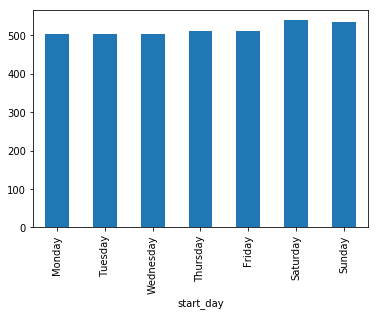

In [42]:
df.groupby('start_day')['duration_sec'].median().plot(kind='bar', color=base_color);

## Observation

> Most rides were taken on Thursdays and Tuesdays. Weekends have the lowest ride records which actually makes sense as weekends are regarded as work off days.

> On average(mean) weekends recorded the highest duration seconds while their is really no big difference on average time duration for trip with respect to the weekdays.

## Question: Which member_gender occurs the most. Make a bar chart representing the number of members in each categorical variables

In [43]:
# Making a count on the member_gender using .value_counts()
df.member_gender.value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

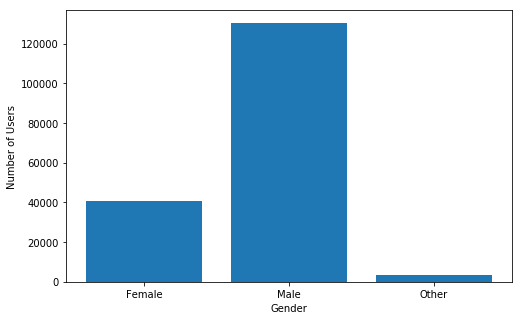

In [44]:
# plotting genders on bar.
plt.figure(figsize=[8,5])
plt.bar(x = df.member_gender.value_counts().keys(), height = df.member_gender.value_counts() )
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()

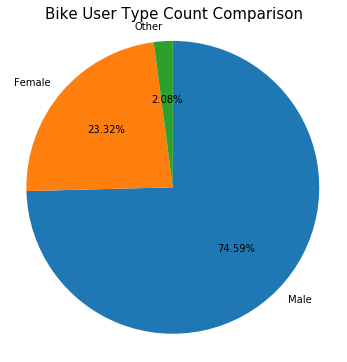

In [45]:
# Show user_type by it's percentage
plt.figure(figsize=(8,6))
sorted_counts = df['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('Bike User Type Count Comparison', fontsize=15);

## Observation
> From the plot above it is shown that most bike riders are male while the second most are female. The least riders are those in the 'other' category. 
> Male riders are three times more than the female riders and thirty-five times more than the 'other' category riders.

### Question: What are the top ten highest start_station_name and end_station_name on average(Duration seconds)

In [46]:
# Grouping by start_station_name to get the highest duration seconds on average
df.groupby('start_station_name').mean()['duration_sec'].sort_values(ascending=False)

start_station_name
San Antonio Park                             2647.962264
Palm St at Willow St                         2467.333333
Foothill Blvd at 42nd Ave                    1859.478261
Empire St at 7th St                          1789.785714
Fell St at Stanyan St                        1706.942308
San Carlos St at Market St                   1648.729730
Williams Ave at 3rd St                       1637.000000
O'Farrell St at Divisadero St                1630.653226
Masonic Ave at Turk St                       1618.245833
Foothill Blvd at Harrington Ave              1576.428571
Grove St at Masonic Ave                      1553.436137
Lane St at Revere Ave                        1405.722222
Lombard St at Columbus Ave                   1388.960497
Addison St at Fourth St                      1372.681034
Newhall St at 3rd St                         1362.254545
DeFremery Park                               1359.928571
Doyle St at 59th St                          1353.484536
Emeryville P

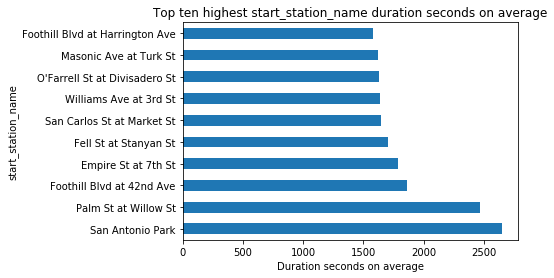

In [47]:
# Making a plot of Top ten highest start_station_name duration seconds on average
df.groupby('start_station_name').mean()['duration_sec'].sort_values(ascending=False)[0:10].plot(
                                   kind='barh', color=base_color)
plt.xlabel('Duration seconds on average')
plt.title('Top ten highest start_station_name duration seconds on average');

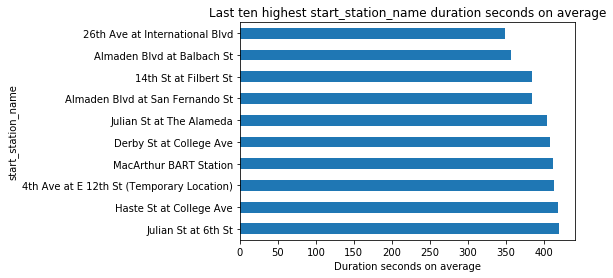

In [48]:
# Making a plot of last ten highest start_station_name duration seconds on average
df.groupby('start_station_name').mean()['duration_sec'].sort_values(ascending=False)[-10:].plot(
                                   kind='barh', color=base_color)
plt.xlabel('Duration seconds on average')
plt.title('Last ten highest start_station_name duration seconds on average');

### Plot of the top ten highest end_station_name on average(Duration seconds)

In [49]:
# Grouping by end_station_name to get the highest duration seconds on average
df.groupby('end_station_name').mean()['duration_sec'].sort_values(ascending=False)

end_station_name
16th St Depot                                26000.166667
Willow St at Vine St                          3535.600000
Lane St at Revere Ave                         2035.239130
Fell St at Stanyan St                         1888.659864
Backesto Park (Jackson St at 13th St)         1832.555556
San Antonio Park                              1792.721311
Lombard St at Columbus Ave                    1791.962801
Williams Ave at 3rd St                        1782.040000
Palm St at Willow St                          1738.285714
Grove St at Masonic Ave                       1712.616438
O'Farrell St at Divisadero St                 1697.719298
Broderick St at Oak St                        1674.635057
San Carlos St at Market St                    1611.619048
Masonic Ave at Turk St                        1597.755459
Cesar Chavez St at Dolores St                 1531.156627
McAllister St at Baker St                     1463.587571
Central Ave at Fell St                        1448.9624

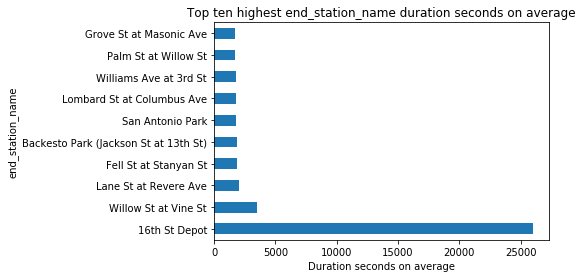

In [50]:
# Making a plot of Top ten highest end_station_name duration seconds on average
df.groupby('end_station_name').mean()['duration_sec'].sort_values(ascending=False)[0:10].plot(
                                   kind='barh', color=base_color)
plt.xlabel('Duration seconds on average')
plt.title('Top ten highest end_station_name duration seconds on average');

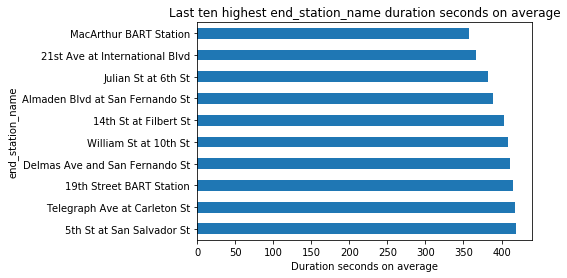

In [51]:
# Making a plot of last ten highest end_station_name duration seconds on average
df.groupby('end_station_name').mean()['duration_sec'].sort_values(ascending=False)[-10:].plot(
                                   kind='barh', color=base_color)
plt.xlabel('Duration seconds on average')
plt.title('Last ten highest end_station_name duration seconds on average');

## Question: How does age affect duration_sec.

### Creating histogram for duration_sec and Age, since they are numeric variable. Your initial plots should show that duration_sec follows a highly skewed distribution same goes with the age column.

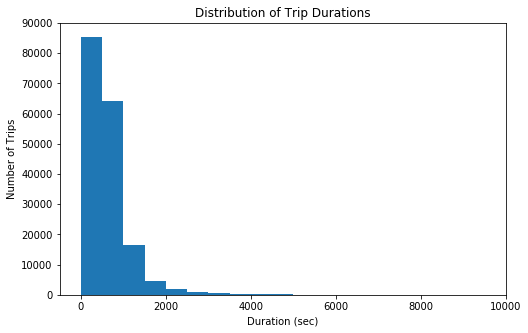

In [52]:
# start with a standard-scaled plot
binsize = 500
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips')
plt.axis([-500, 10000, 0, 90000])
plt.show()

### Observation

> There is a long tail in the distribution implying high skewness so lets put it on log scale.
Befor log transformation, the data is roughly unimodal, with a large peak somewhere between 0 and 1000 secs.

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


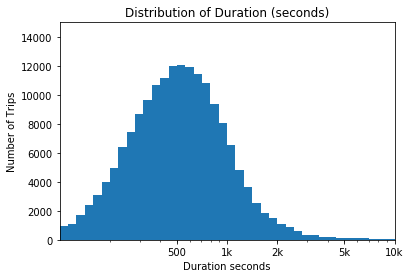

In [53]:
# Applying log transformation on the dataset to see a better view of our plot
log_binsize = 0.05
log_bins = 10 ** np.arange(2.0, np.log10(df['duration_sec'].max()) + log_binsize, log_binsize)
plt.hist(data = df, x = 'duration_sec', bins = log_bins)
plt.xlabel('Duration seconds')
plt.xscale('log')
plt.ylabel('Number of Trips')
plt.title('Distribution of Duration (seconds)')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 15000])
plt.show()

### Observation

> Trip duration is mostly concentrated on the lower end of the duration seconds. Most of the values are less than 2000 seconds with peak around 600-800 seconds. Trip duration values first increases starting from around 1000 values at 0 to 12000 values at around 600 but then starts to fall and moving below 2000 values under 2000 sec.

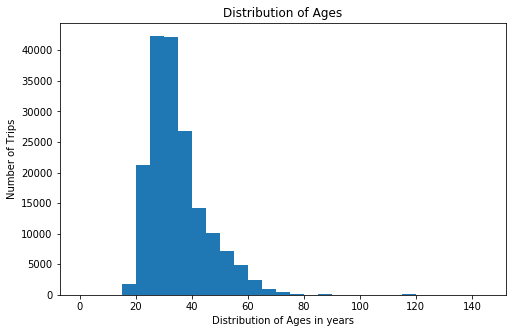

In [54]:
# Making Age plot distribution using Histogram
# start with a standard-scaled plot
binsize = 5
bins = np.arange(0, df['Age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'Age', bins = bins)
plt.title('Distribution of Ages')
plt.xlabel('Distribution of Ages in years')
plt.ylabel('Number of Trips')
plt.show()

### Observation

> There is a long tail in the distribution implying high skewness so lets put it on log scale.
Befor log transformation, the data is roughly unimodal, with a large peak somewhere between 20 and 40 years.

>Applying log transform on the age column then make a hist plot to see how the transformation changes.
Applying log transformation reduces the skewness.

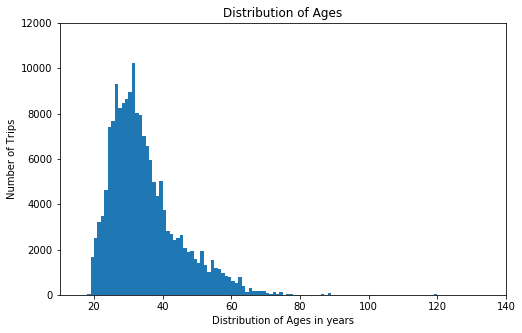

In [55]:
# Making Age plot distribution using Histogram
binsize = 1
bins = np.arange(0, df['Age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'Age', bins = bins)
plt.axis([10, 140, 0, 12000])
plt.title('Distribution of Ages')
plt.xlabel('Distribution of Ages in years')
plt.ylabel('Number of Trips')
plt.show()

## Observation

> We can see that the distribution is more concentrated between 20 to 40 years old. This implies those in younger age group take more time riding bikes than those older.

## Question: When are most trips taken in terms of time of day?

> Ride Frequency by hours

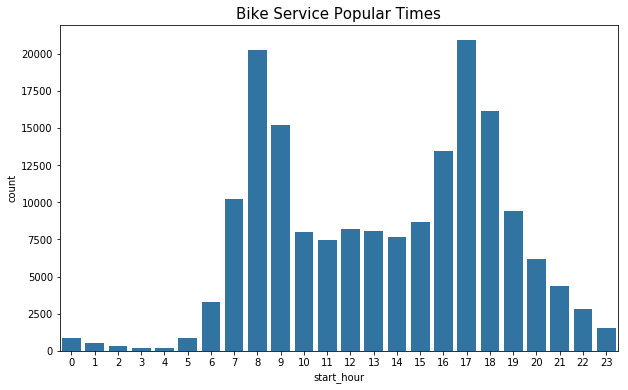

In [56]:
hour_order = np.arange(0,24)

plt.figure(figsize=(10,6))
plt.title('Bike Service Popular Times', fontsize=15)
ax = sns.countplot(data=df, x='start_hour', order=hour_order, color=base_color);

## Observation
> The time range with the highest rides is within 8-9th hour which depict early morning and 17-18th hour depicting later in the day(evening)
> The higher ride frequencies for morning (8th and 9th hours) and evening (17th and 18th hours) can be automatically linked to rush hours where people leave for work and come back later in the evening.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?¶
The trip duration takes a large amount of values and is concentrated to a tail so I looked at it in log transform and found that peak occurs at 600 seconds starting from 0 and then distribution starts to reduce drastically and does not regain any other peak value.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
Birth year is converted by substracting the year from current year(2019) so this gives us a perfect age distibution, this action is performed as age gives a better idea as regards to the trip duration dependency. Age distribution was then plotted.
Also most common start stations and end stations are plotted picking those only common to both start and end station.

## Bivariate Exploration

### Checking on average which of the days of the week has the highest Duration seconds on average.

In [57]:
# Grouping by 'start_day' to find the days with the highest duration seconds on average.
df.groupby('start_day')['duration_sec'].mean()

start_day
Monday       696.970906
Tuesday      652.839459
Wednesday    665.127946
Thursday     678.289748
Friday       681.274699
Saturday     849.771750
Sunday       858.673649
Name: duration_sec, dtype: float64

### Since the dataset contain too much outliers, applying masking to reduce the outlier so a clearer diagram can be shown

In [58]:
# Making a boxplot to see if our estimation from above was valid.
def boxplot_with_outliers(x, y):
    plt.figure(figsize=(10,6))
    sns.boxplot(x, y, data=df, color=sns.color_palette()[0])
    plt.show()

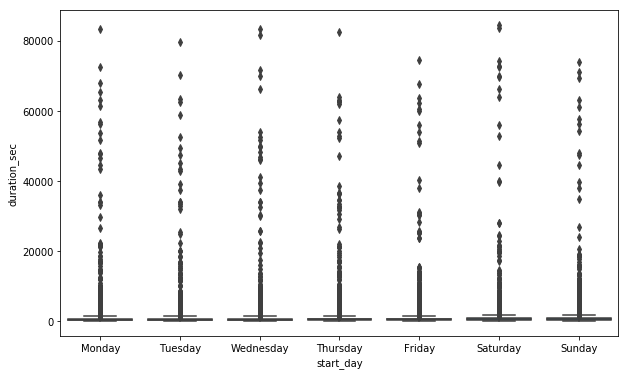

In [59]:
boxplot_with_outliers(x='start_day', y='duration_sec')

In [60]:
# Making a boxplot to see if our estimation from above was valid but ensuring outliers were removed.
def boxplot_without_outliers(x, y):
    plt.figure(figsize=(10,6))
    # Using masking to remove outliers
    sns.boxplot(x, y, data=df[df['duration_sec'] < 2000], color=sns.color_palette()[0])
    plt.show()

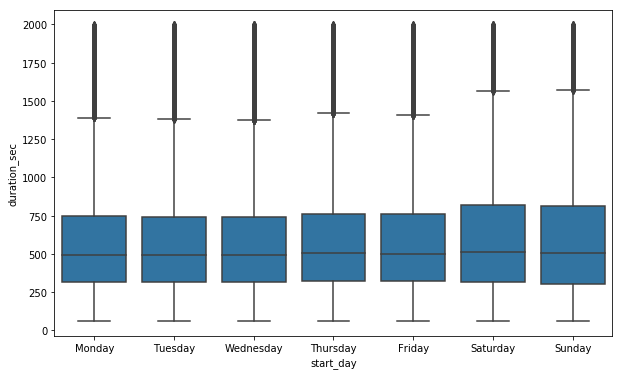

In [61]:
boxplot_without_outliers(x='start_day', y='duration_sec')

## Observation

> On average weekends recorded the highest duration seconds while their is really no big difference on average time duration for trip with respect to the weekdays.

### member_gender vs Duration seconds

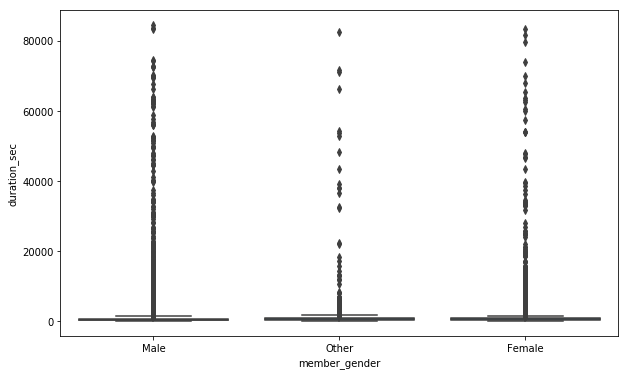

In [62]:
boxplot_with_outliers(x='member_gender', y='duration_sec')

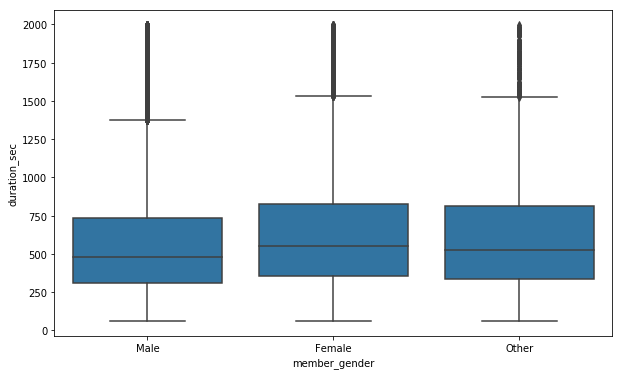

In [63]:
#Removing outlier to display a better plot
boxplot_without_outliers('member_gender', y='duration_sec')

> Though quantity of male riders are very high than 'other' and 'female' but we can see that higher percentage of 'female' and 'other' rides longer trips than males on average.

> Female gender trips take a longer duration on average than 'male' or 'other' gender categories.

> Gender trip time duration: female > other > male on average

### User type vs Duration seconds

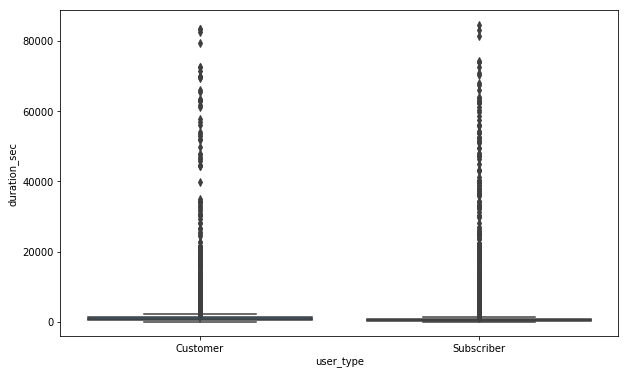

In [64]:
boxplot_with_outliers(x = 'user_type', y = 'duration_sec')

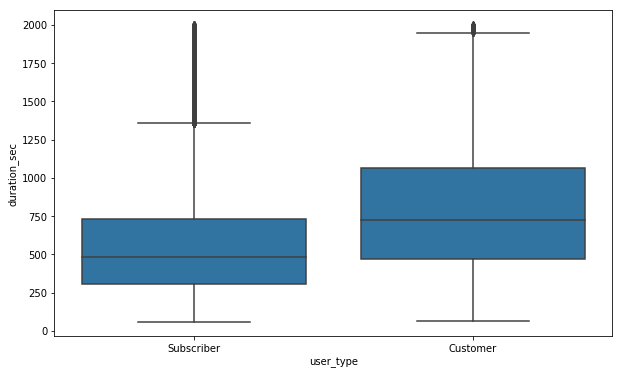

In [65]:
# Removing outliers for a better plot
boxplot_without_outliers(x = 'user_type', y = 'duration_sec')

> From the plot above we can see that higher percentage of customers are taking longer trips when compared to subscribers.

> Indicating Customer trips take a longer duration on average than subscriber user type.

## Question: Which of the days of the week do user_type has the highest amount of rides

#### Start days of ride vs User type 

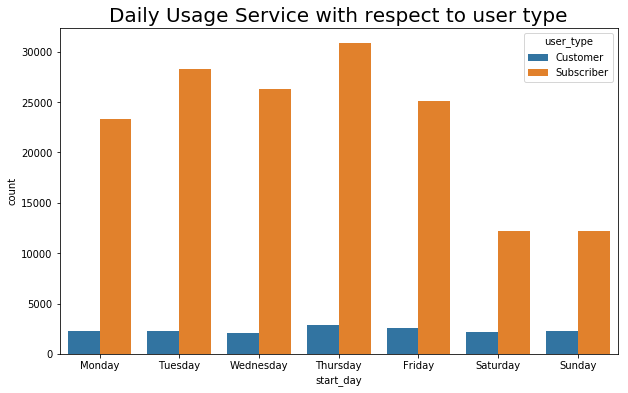

In [66]:
plt.figure(figsize=(10,6))
plt.title('Daily Usage Service with respect to user type', fontsize=20)
sns.countplot(data=df, x='start_day', hue='user_type')

## Question: What's the connection between bike_share_for_all_trip and user_type

### User type vs bike sharing for trips

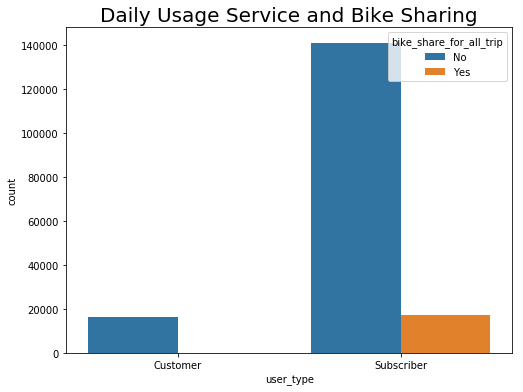

In [67]:
plt.figure(figsize=(8,6))
plt.title('Daily Usage Service and Bike Sharing', fontsize=20)
sns.countplot(data=df, x='user_type', hue='bike_share_for_all_trip');

## Observation

> We can deduce from the charts above that bike sharing is only available to subscribers and customer type doesn’t really affect the number of trips in any week day as they look all the same. And the subscribers undergo more trips on Thursdays and Tuesdays.

## Question: What age range has the highest value of duration_sec.

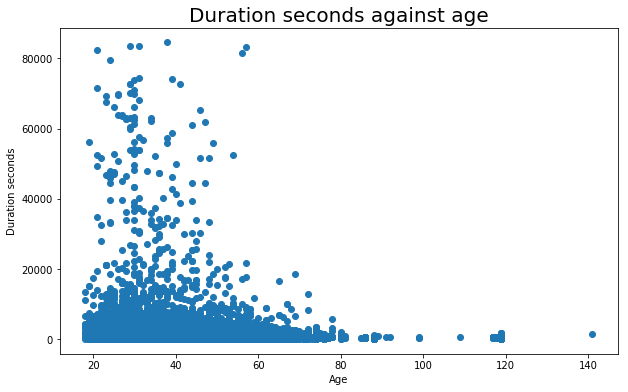

In [68]:
# Plot of duration_sec vs Age
plt.figure(figsize=(10,6))
plt.title('Duration seconds against age', fontsize=20)
plt.scatter(data=df, x='Age', y='duration_sec')
plt.xlabel('Age')
plt.ylabel('Duration seconds');

## Observation

> The real life scenerio should always be that those younger should take more rides. The plot above depicts exactly that showing that those within 17-45 years of age took more rides than those above 50 years.
Looking at plot it can be deduce that most frequent users of bikes are aged between 17 and 45. Indicating younger members clocked Higher duration in seconds .

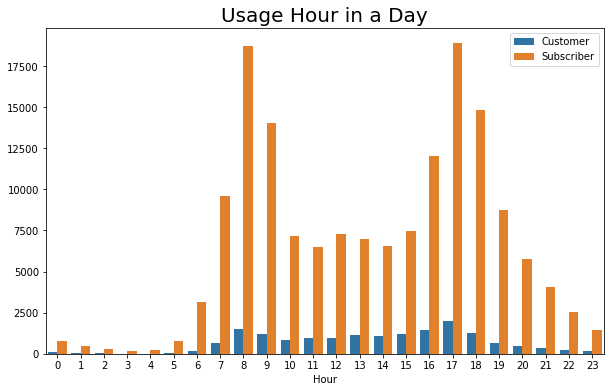

In [76]:
# Bivariate Plot
# A plot to show relationship between two categorical variable, user_type and start_day
plt.figure(figsize=(10,6))
plt.title('Usage Hour in a Day', size=20)
ax = sns.countplot(data=df, x='start_hour', hue='user_type')

ax.set(xlabel='Hour', ylabel='')
plt.gca().legend().set_title('');

## Observation

> Subscribers take more rides on hourly basis as compared to customers. 
> The time range with the highest rides is within 8-9th hour for both subscribera and customers which depict early morning and 16-18th hour depicting later in the day(evening)
> The higher ride frequencies for morning (8th and 9th hours) and evening (16th and 18th hours) can be automatically linked to rush hours where people leave for work and come back later in the evening.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
Trip Duration is very dependendable on the age of the member, which I had anticipated. On the other hand Start station and end station does not much determine the trip duration. It only suggests that some starting stations are having higher trip durations as starting point and some end stations are having higher trip durations as ending point.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
I expected that categorial variables like `user_type` and `gender` features having higher values should have higher trip duration but from analysis it was shown to go the other way round for example, `gender`, value of `male` members is higher than that of `female` and `others` but the percentage of female members to take longer trips on is higher.

## Multivariate Exploration

### Scatter plot between Age and Duration seconds using hue parameter as member_gender

In [70]:
plt.rcParams['figure.figsize'] = 10, 6

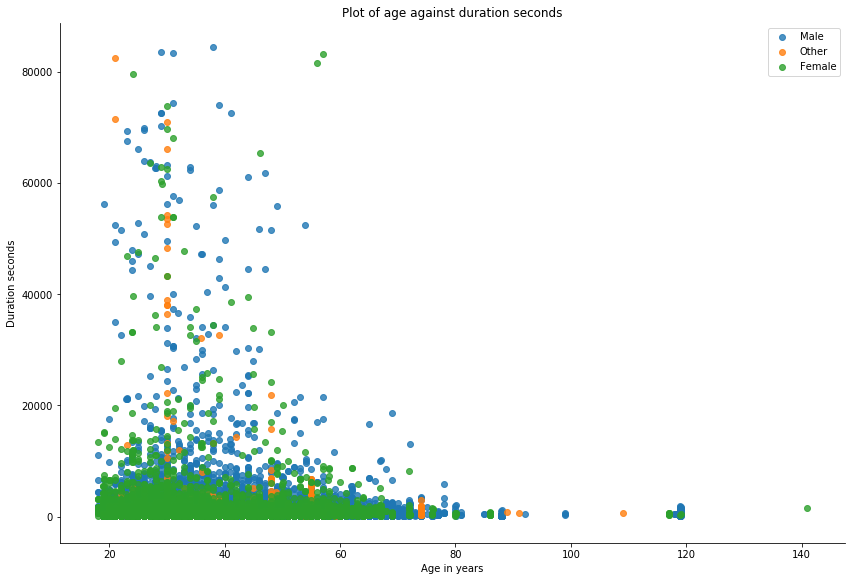

In [71]:
# Making a scatter plot of age and duration seconds coloring all points based on member_gender
g = sns.FacetGrid(data=df, hue='member_gender', size=8, aspect=1.5)
g.map(sns.regplot, 'Age', 'duration_sec', x_jitter=0.04, fit_reg=False)
plt.xlabel('Age in years') 
plt.ylabel('Duration seconds')
plt.title('Plot of age against duration seconds')
plt.legend();

> As the plot above isn't really showing any clearity, lets seperate all three genders into different graphs.

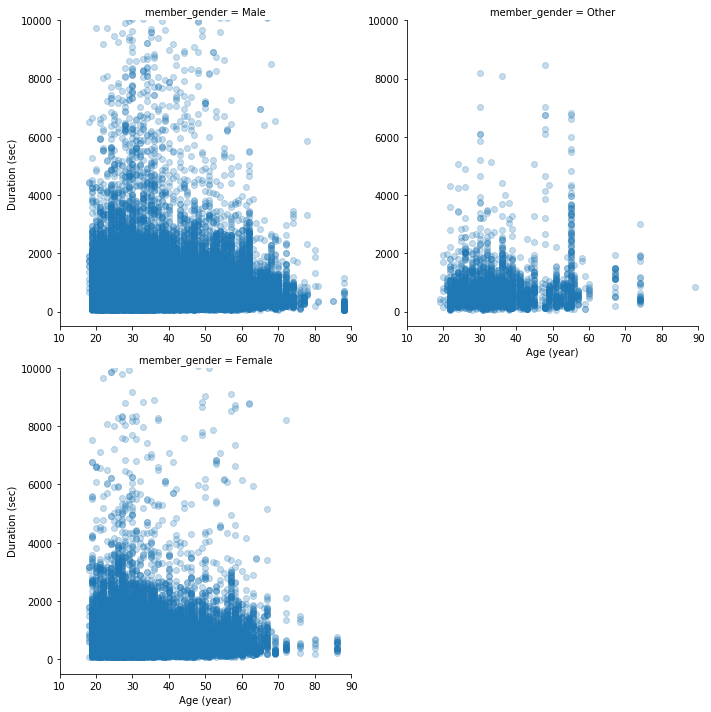

In [72]:
g = sns.FacetGrid(data = df, col = 'member_gender', size = 5,  
                  col_wrap=2, sharey=False, sharex=False,
                  xlim = [10, 90], ylim = [-500, 10000])
g.map(plt.scatter, 'Age', 'duration_sec', alpha=0.25)
g.set_xlabels('Age (year)')
g.set_ylabels('Duration (sec)')

plt.show()

## Observation

> From the three separated plot above it can be shown that the age range with the highest Duration seconds for rides are within 20-50 years of age. As for the male and fewmale category we can see a slopy decline in duration as the age of the member increases.

### Scatter plot between Age and Duration seconds using hue parameter as user_type

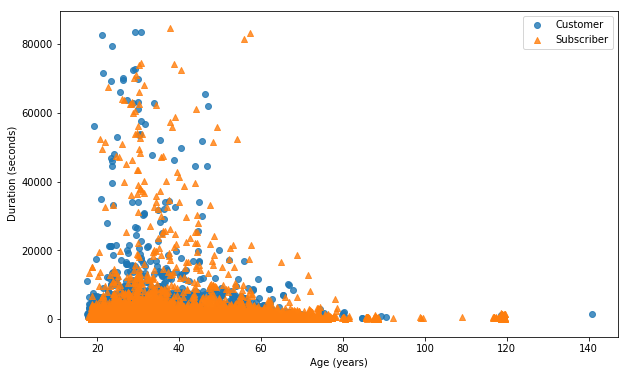

In [73]:
# Shape representation of user_type in a scatter plot between age and duration seconds.
ttype_markers = [['Customer','o'], ['Subscriber', '^']]
plt.figure(figsize=(10, 6))
for ttype, marker in ttype_markers:
    plot_data = df.loc[df['user_type'] == ttype]
    sns.regplot(data = plot_data, y = 'duration_sec', x = 'Age',
               x_jitter=0.5, marker=marker, fit_reg=False);
plt.xlabel('Age (years)')
plt.ylabel('Duration (seconds)')
plt.legend(['Customer', 'Subscriber']);

> As the plot above isn't really showing any clearity, lets seperate all two user types into different graphs.

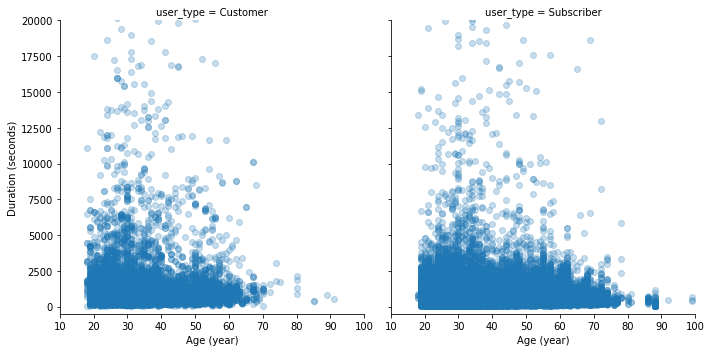

In [74]:
g = sns.FacetGrid(data = df, col = 'user_type', col_wrap = 2, size = 5,
                 xlim = [10, 100], ylim = [-500, 20000])
g.map(plt.scatter, 'Age', 'duration_sec', alpha=0.25)
g.set_xlabels('Age (year)')
g.set_ylabels('Duration (seconds)')

plt.show()

In this case both Customer and Subscriber are showing similer trends for age and trip duration. But there is slight tilt to higher age for subscribers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> Here we observed that though the number of higher duration trip is higher for 'male' but percentage is higher for 'women' and 'other', also 'other' has one more peak at nearly the age of 60 years for higher duration time. For different user types both are showing similer trends for age and trip duration. But there is slight tilt to higher age for subscribers.

### Were there any interesting or surprising interactions between features?

> A second duration peak for 'other' gender at extreme old age is a surprising as compared to the analysis noted before.

## Conclusions

This analysis project focus on exploring and analyzing the "201902-fordgobike-tripdata.csv" dataset which is a dataset of bike ride with multiple features and the objective of the analysis is figuring out the factors that affects the time durations of each trips. This requires adequate visualizations so as to shed light on relationships between features and draw insights from the visualizations.

More than 15 visualization plots are generated followed by observations from each plot provided after each plot so as to communicate adequately what's derived from the charts and the message to put mind to from the charts.

Our principal feature of interest is the duration_sec. Other features explored are Age which was derived by subtracting each member year of birth from 2019, user_type, start_station_name, end_station_name, member_gender, hours(Hours of the day) and bike_share_for_all_trip.


### Some of the insights derived from the analysis are listed below:

The type of user has an influence on the use of this service. There are quite a lot of differences here and there, such as: 

- Days of the week
> Most rides were taken on Thursdays and Tuesdays. Weekends have the lowest ride records which actually makes sense as weekends are regarded as work off days.

- Hour of the day
> Most rides were taken between 8th-9th hours and 17th-18th hours. The higher ride frequencies for the morning (8th and 9th hrs) and evening (17th and 18th hrs) can be linked to rush hours where people leave for work and come back later in the evening.

- User Type
> Though we have higher number of subscribers as compared to customers, still higher percentage of customers are taking longer trips when compared to subscribers.
> It was also shown that bike sharing is available to only subscribers. And the subscribers undergo more trips on Thursdays and Tuesdays.

- Age
> The age range between 20-45 have the highest duration seconds, indicating that as the age increases the duration second reduces.